In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# import data
data = pd.read_csv("cleaned_data.csv")
data.head()

C:\Users\Gian\AppData\Local\Temp\ipykernel_5464\906520572.py:8: DtypeWarning: Columns (21,22,36,37,46,47,48,49,50,51,52,53,54,56,111,112,113,118) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("cleaned_data.csv")


,Reporting Railroad Name,Report Year,Accident Number,Accident Year,Accident Month,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Name,...,Other Railroad Company Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Company Name,Other Railroad Holding Company,Maintenance Railroad Company Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company
0,Northern Indiana Commuter Transportation District,2017.0,N1700013,17.0,6.0,NaN,NaN,NaN,NaN,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,...,NaN,NaN,NaN,NaN,NaN,Passenger (Formerly Commuter),Class 3,SMT-4 - CP/CN/CCD,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,Not Assigned
1,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,2017.0,201707188,17.0,6.0,Northern Indiana Commuter Transportation District,N1700013,17.0,6.0,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,...,Passenger (Formerly Commuter),Class 3,SMT-4 - CP/CN/CCD,Northern Indiana Commuter Transportation District,Not Assigned,Passenger (Formerly Commuter),Class 3,SMT-4 - CP/CN/CCD,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,Not Assigned
2,Conrail,1981.0,0420001,81.0,4.0,NaN,NaN,NaN,NaN,Conrail,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 3,NaN,Consolidated Rail Corporation,Not Assigned
3,Illinois Central Railroad Company,2007.0,543854,7.0,1.0,NaN,NaN,NaN,NaN,Cargill Elevator,...,NaN,NaN,NaN,NaN,NaN,Shippers,Class 3,NaN,Cargill Elevator,Not Assigned
4,Illinois Central Railroad Company,2017.0,938223,17.0,10.0,NaN,NaN,NaN,NaN,Illinois Central Railroad Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-4 - CP/CN/CCD,Canadian National - North America,Canadian National - North America


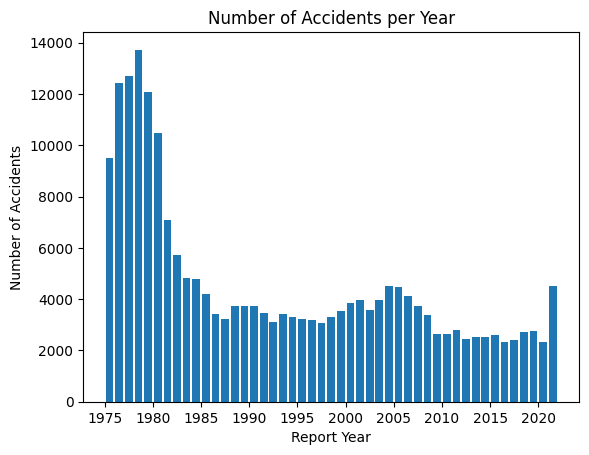

In [2]:
# data['year'] = data['year'].apply(lambda x: 1900 + x if x < 100 else 2000 + x)

# histogram of amount of accidents per Report Year
# with bins = amount of years
# add space between each bin
min_year = int(data['Report Year'].min())
max_year = int(data['Report Year'].max())
plt.hist(data['Report Year'], bins=range(min_year, max_year + 1), rwidth=0.8)
plt.xlabel('Report Year')
plt.xticks(range(min_year, max_year + 1, 5))
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.show()

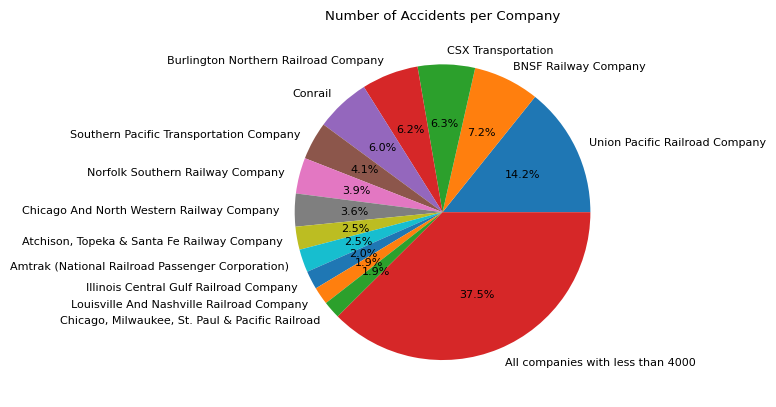

In [3]:
# Pie plot showing number of accidents per company
# Group all companies with less than 500 accidents into "Other"
companies = data['Reporting Railroad Name'].value_counts()
companies['All companies with less than 4000'] = companies[companies < 4000].sum()
companies = companies[companies > 4000]
# make text smaller
matplotlib.rcParams.update({'font.size': 8})
plt.pie(companies, labels=companies.index, autopct='%1.1f%%')
plt.title('Number of Accidents per Company')
plt.show()

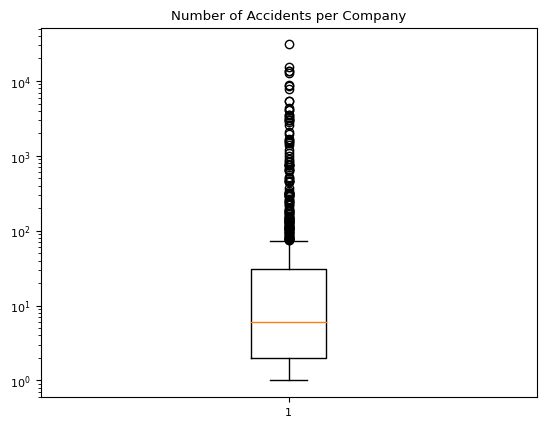

In [4]:
# box and whisker plot of accidents per company
# make  alpha = 0.5
companies = data['Reporting Railroad Name'].value_counts()
plt.boxplot(companies)
plt.title('Number of Accidents per Company')
# log scale
plt.yscale('log')
plt.show()

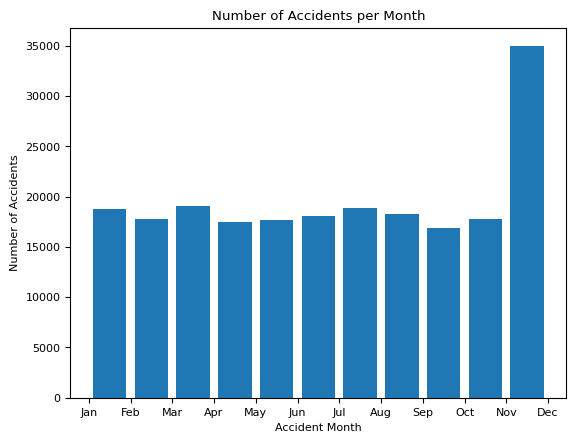

In [5]:
# Accident month
# histogram of amount of accidents per month
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.hist(data['Accident Month'], bins=range(1, 13), rwidth=0.8)
plt.xlabel('Accident Month')
plt.xticks(range(1, 13), months)
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Month')
plt.show()

In [27]:
# get data head for longitude and latitude
data[['Longitude', 'Latitude']].head()
data_long_lat = data[['Longitude', 'Latitude']]
data_long_lat = data_long_lat.dropna()
# remove all with 0
data_long_lat = data_long_lat[(data_long_lat.T != 0).any()]

data_long_lat = data_long_lat[(np.abs(stats.zscore(data_long_lat)) < 4).all(axis=1)]

2.234831760753548


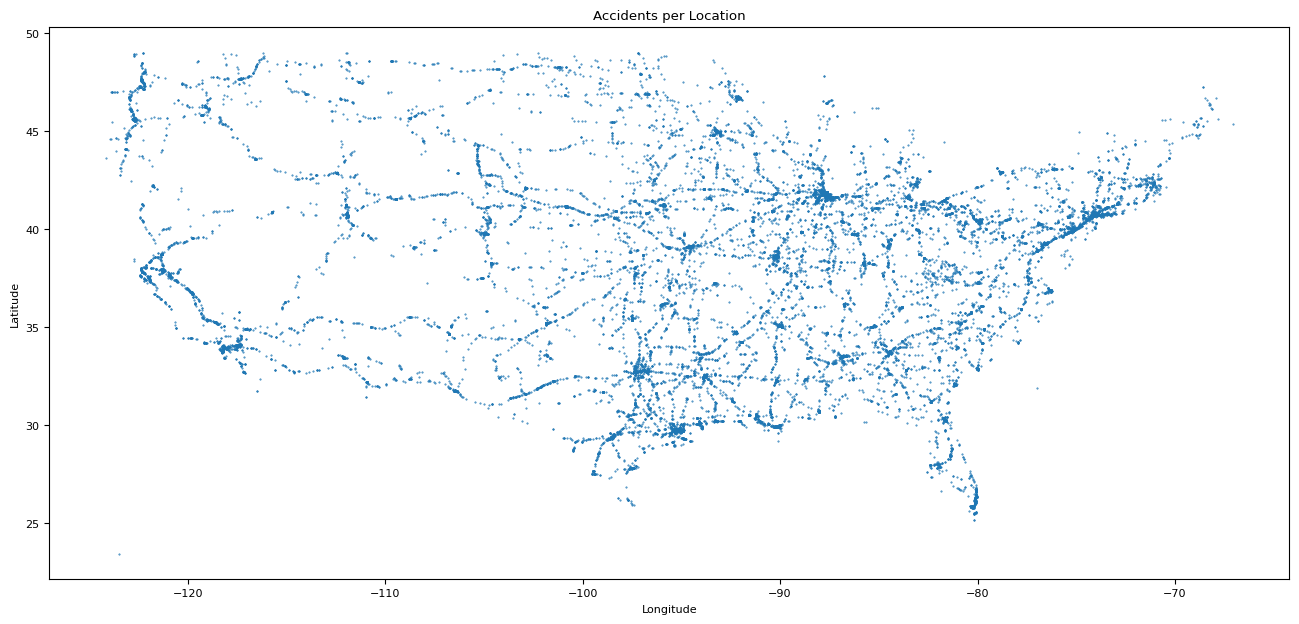

In [37]:
# find max and min of long and lat in order to find the proper figure size so that the plot isn't squished
long_max = data_long_lat['Longitude'].max()
long_min = data_long_lat['Longitude'].min()
lat_max = data_long_lat['Latitude'].max()
lat_min = data_long_lat['Latitude'].min()
div = (long_max - long_min) / (lat_max - lat_min)
print(div)
width = 16
height = width / div
plt.figure(figsize=(width, height))
plt.scatter(data_long_lat['Longitude'], data_long_lat['Latitude'], s=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents per Location')
plt.show()